# **Lending Club Case Study:**

Lending Club is the largest online loan marketplace, facilitating personal loans, business loans and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study. In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.
Our steps will be:
- Data sourcing & understanding
- Data handling & cleaning
- Exploratory analysis
- Summarise findings


**Team members : Uday Kumar Adavi & Bibhu Sundar Sahoo**

### Import libraries


In [1]:
#Importing libraries needed for this EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

### Environment setup

In [2]:
#Setting environment variables
sns.set_style("darkgrid")
plt.style.use("tableau-colorblind10")
warnings.filterwarnings("ignore")

## **Data Sourcing & Understanding:**
-------------------------------------------------------------


In [3]:
#extract data from csv file
loan_df = pd.read_csv('loan.csv')
loan_df.shape # check shape to know how many rows and columns have been loaded into the dataframe

(39717, 111)

In [4]:
#inspect sample rows
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


For the current EDA exercise, the focus will be on Customer and Loan attributes only. Hence we can straight away remove the variables that represent post loan behaviour of the customer.
Based on the description in the data dictionary,decision has been made to remove the below columns:
 - 'total_pymnt',
 - 'total_pymnt_inv'
 - 'total_rec_prncp'
 - 'total_rec_int'
 - 'total_rec_late_fee'
 - 'pymnt_plan'
 - 'out_prncp'
 - 'out_prncp_inv'
 - 'last_pymnt_d'
 - 'last_pymnt_amnt'
 - 'next_pymnt_d'

In [5]:
#Remove data not in scope of our analysis
post_loan_data_points = ['total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int'
                         ,'total_rec_late_fee','pymnt_plan','out_prncp','out_prncp_inv'
                        ,'last_pymnt_d','last_pymnt_amnt', 'next_pymnt_d']

loan_df.drop(labels = post_loan_data_points, axis=1, inplace = True)

loan_df.shape # check shape to know how many rows and columns have been loaded into the dataframe

(39717, 100)

The primary purpose of our analysis is to understand the patterns of default. The **'loan_status'** column is the relevant column to understand this.

In [6]:
# Target variables of interest
loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

For the analysis, we will remove the rows with loan status as 'Current' because these loans are still in the their life time and we do not know whether the customers will default on these loans or not

In [7]:
#Remove the 'Current' loan status rows
loan_df = loan_df[loan_df.loan_status !='Current']

#check the column to verify
loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

## **Data Handling & Cleaning:**
------------------------------------------------------------------------------------
 - Look at missing values & treat accrodingly 
 - Check data types & formats
 - Standardise data formats where needed
 - Look at univariates to understand outliers and treat as necessary
 - Understand motivations to create derived variables, bins & transformations

In [8]:
# Drop Duplicate rows if any?
loan_df.drop_duplicates()
loan_df.shape

(38577, 100)

No duplicate rows were found

In [9]:
#check columns and null counts
loan_df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 100 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38577 non-null  int64  
 1   member_id                       38577 non-null  int64  
 2   loan_amnt                       38577 non-null  int64  
 3   funded_amnt                     38577 non-null  int64  
 4   funded_amnt_inv                 38577 non-null  float64
 5   term                            38577 non-null  object 
 6   int_rate                        38577 non-null  object 
 7   installment                     38577 non-null  float64
 8   grade                           38577 non-null  object 
 9   sub_grade                       38577 non-null  object 
 10  emp_title                       36191 non-null  object 
 11  emp_length                      37544 non-null  object 
 12  home_ownership                 

**Finding:** There are several columns which have 0 non-null values

### **Missing values and their handling:**

In [10]:
#Removing columns with 0 non null values
loan_df.dropna(axis = 1, how = 'all',inplace = True)

#Removing rows with 0 non null values
loan_df.dropna(axis = 0, how = 'all',inplace = True)

#Checking after removing
loan_df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  385

In [11]:
# % of missing values - for columns that have missing values
cols_50null = loan_df.isnull().mean().round(4).sort_values( ascending = False)*100
cols_50null[cols_50null.values > 0]

mths_since_last_record        92.90
mths_since_last_delinq        64.56
desc                          32.47
emp_title                      6.19
emp_length                     2.68
pub_rec_bankruptcies           1.81
chargeoff_within_12_mths       0.15
collections_12_mths_ex_med     0.15
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
dtype: float64

Missing data is in these columns:
 - desc
 - emp_title 
 - emp_length
 - pub_rec_bankruptcies 
 - collections_12_mths_ex_med 
 - chargeoff_within_12_mths 
 - revol_util 
 - tax_liens 
 - title 
 - last_credit_pull_d 

In [12]:
#Removing columns with nulls greater than 50 perc
cols_drop1 = cols_50null[cols_50null.values > 50]
loan_df.drop(columns=cols_drop1.index, inplace=True)

In [13]:
#Checking after removing
loan_df.shape

(38577, 44)

In [14]:
#Check value range for column to remove columns with single value
cols_uniquevals=loan_df.nunique().sort_values()
cols_uniquevals

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
term                              2
loan_status                       2
pub_rec_bankruptcies              3
verification_status               3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_credit_pull_d              106
int_rate                        370
earliest_cr_line                524
zip_code                    

In [15]:
#Removing columns with single values
cols_drop2 = cols_uniquevals[cols_uniquevals.values == 1]
loan_df.drop(columns=cols_drop2.index,inplace=True)

In [16]:
#Checking after removing
loan_df.shape

(38577, 36)

In [17]:
# Check Final left out missing values the dataset
cols_50null = loan_df.isnull().mean().round(4).sort_values( ascending = False)*100
cols_50null[cols_50null.values > 0]

desc                    32.47
emp_title                6.19
emp_length               2.68
pub_rec_bankruptcies     1.81
revol_util               0.13
title                    0.03
last_credit_pull_d       0.01
dtype: float64

### Remaining Missing Data

Missing data is in these columns:
- desc                       32.47
- emp_title                   6.19
- emp_length                  2.68
  - Impute using median
- pub_rec_bankruptcies        1.81
  - Impute using median

Below can be ignored:
- revol_util                  0.13
- title                       0.03
- last_credit_pull_d          0.01
- desc                        32.47 


Ignoring few rows as they have missing values for revol_util,title,last_credit_pull_d which is less than 0.13% of the entire dataset

In [18]:
#remove data that can be ignored
loan_df.dropna(subset=['revol_util','title','last_credit_pull_d'],inplace=True)

#check
loan_df.shape

(38514, 36)

### Impute missing Data

##### Impute emp_length

In [19]:
# Look at distribution of emp length
loan_df.emp_length.value_counts(dropna=False)

10+ years    8486
< 1 year     4494
2 years      4286
3 years      4008
4 years      3333
5 years      3187
1 year       3162
6 years      2164
7 years      1707
8 years      1433
9 years      1225
NaN          1029
Name: emp_length, dtype: int64

In [20]:
#Replace the nulls with the Mode
loan_df['emp_length'] = loan_df.emp_length.fillna(loan_df.emp_length.mode()[0])

#check distribution
loan_df.emp_length.value_counts(dropna=False)

10+ years    9515
< 1 year     4494
2 years      4286
3 years      4008
4 years      3333
5 years      3187
1 year       3162
6 years      2164
7 years      1707
8 years      1433
9 years      1225
Name: emp_length, dtype: int64

#### Impute pub_rec_bankruptcies

In [21]:
# Look at distribution of pub_rec_bankruptcies
loan_df.pub_rec_bankruptcies.value_counts(dropna=False)

0.0    36177
1.0     1636
NaN      696
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [22]:
#Replace the nulls with the Mode
loan_df['pub_rec_bankruptcies'] = loan_df.pub_rec_bankruptcies.fillna(loan_df.pub_rec_bankruptcies.mode()[0])

#check
loan_df.pub_rec_bankruptcies.value_counts(dropna=False)

0.0    36873
1.0     1636
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [23]:
# Check Final left out missing values the dataset
cols_50null = loan_df.isnull().mean().round(4).sort_values( ascending = False)*100
cols_50null[cols_50null.values > 0]

desc         32.47
emp_title     6.17
dtype: float64

We are not likely to use these columns for the analysi and hence have left 'desc' and 'emp_title' as is

#### Final missing value in the dataset

In [24]:
# Final list of colums and their % missing values
loan_df.isnull().mean().round(4).sort_values( ascending = False)*100

desc                       32.47
emp_title                   6.17
purpose                     0.00
zip_code                    0.00
addr_state                  0.00
dti                         0.00
delinq_2yrs                 0.00
earliest_cr_line            0.00
inq_last_6mths              0.00
open_acc                    0.00
pub_rec                     0.00
revol_bal                   0.00
revol_util                  0.00
total_acc                   0.00
recoveries                  0.00
collection_recovery_fee     0.00
last_credit_pull_d          0.00
title                       0.00
id                          0.00
member_id                   0.00
grade                       0.00
loan_amnt                   0.00
funded_amnt                 0.00
funded_amnt_inv             0.00
term                        0.00
int_rate                    0.00
installment                 0.00
sub_grade                   0.00
url                         0.00
emp_length                  0.00
home_owner

### **Data Formatting & Standardising:**

#### Int_rate

In [25]:
# Check format
loan_df[['term','int_rate','revol_util','emp_length']].head()

,term,int_rate,revol_util,emp_length
0,36 months,10.65%,83.70%,10+ years
1,60 months,15.27%,9.40%,< 1 year
2,36 months,15.96%,98.50%,10+ years
3,36 months,13.49%,21%,10+ years
5,36 months,7.90%,28.30%,3 years


#### 2) Format int_rate, remove trailing %

In [26]:
# Format int rate, remove trailing %
loan_df['int_rate']=loan_df['int_rate'].str.replace('%','').astype(float)

# Check format
loan_df.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

#### Format revol_util, remove trailing %

In [27]:
# Format term, remove trailing %
loan_df['revol_util']=loan_df['revol_util'].str.replace('%','').astype(float)

# Check format
loan_df.revol_util.head()

0    83.7
1     9.4
2    98.5
3    21.0
5    28.3
Name: revol_util, dtype: float64

#### Emp length

In [28]:
#loan_df.emp_length = loan_df.emp_length.apply(lambda x: 0 if x=='< 1 year' else (x.split()[0]) )

#### delinq_2yrs

In [29]:
# Change to String
loan_df.delinq_2yrs=loan_df.delinq_2yrs.astype(str)

#### pub_rec_bankruptcies

In [30]:
# Change to String
loan_df.pub_rec_bankruptcies=loan_df.pub_rec_bankruptcies.astype(str)

####  Date columns  

In [31]:
# Check format
loan_df[['issue_d','earliest_cr_line','last_credit_pull_d']].describe()

,issue_d,earliest_cr_line,last_credit_pull_d
count,38514,38514,38514
unique,55,524,106
top,Nov-11,Oct-99,May-16
freq,2060,360,9322


In [32]:
# issue_d format
loan_df['issue_d'] = pd.to_datetime(loan_df.issue_d,format='%b-%y')
loan_df['earliest_cr_line'] = pd.to_datetime(loan_df.earliest_cr_line,format='%b-%y')
loan_df['last_credit_pull_d'] = pd.to_datetime(loan_df.last_credit_pull_d,format='%b-%y')

print(loan_df[['issue_d','earliest_cr_line','last_credit_pull_d']].describe())
print("\n The 2068-12-01 is incorrect data for earliest_cr_line during formatting function from python")

                    issue_d     earliest_cr_line   last_credit_pull_d
count                 38514                38514                38514
unique                   55                  524                  106
top     2011-11-01 00:00:00  1999-10-01 00:00:00  2016-05-01 00:00:00
freq                   2060                  360                 9322
first   2007-06-01 00:00:00  1969-02-01 00:00:00  2007-05-01 00:00:00
last    2011-12-01 00:00:00  2068-12-01 00:00:00  2016-05-01 00:00:00

 The 2068-12-01 is incorrect data for earliest_cr_line during formatting function from python


In [33]:
today = pd.datetime.today()

count_dateissue = loan_df[loan_df.earliest_cr_line > today ]['earliest_cr_line'].value_counts().sum()
print("We have " + str(count_dateissue) + " record with incorrect dates reflected to be fixed by subtracting 100 \n")

loan_df['earliest_cr_line']=loan_df.earliest_cr_line.apply(lambda x :x.replace(year=x.year-100) if x.year > today.year else x)

print(loan_df[['issue_d','earliest_cr_line','last_credit_pull_d']].describe()) 
print("\n We have " + str(loan_df[loan_df.earliest_cr_line > today ]['earliest_cr_line'].value_counts().sum()) + " record with incorrect dates reflected now\n")

We have 85 record with incorrect dates reflected to be fixed by subtracting 100 

                    issue_d     earliest_cr_line   last_credit_pull_d
count                 38514                38514                38514
unique                   55                  524                  106
top     2011-11-01 00:00:00  1999-10-01 00:00:00  2016-05-01 00:00:00
freq                   2060                  360                 9322
first   2007-06-01 00:00:00  1946-01-01 00:00:00  2007-05-01 00:00:00
last    2011-12-01 00:00:00  2008-11-01 00:00:00  2016-05-01 00:00:00

 We have 0 record with incorrect dates reflected now



### **Distributions, Outliers & Treatment**

In [34]:
#define custom function to plot distribution plot and box plot for numeric variables
def distplot_num(var, df):
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    sns.distplot(df[var])
    plt.title("Distribution of "+var)

    plt.subplot(1,2,2)
    sns.boxplot(df[var])
    plt.title("Boxplot for "+var)
    
    plt.show()       

In [35]:
#define custom function for understanding distribution based on percentiles
def dist_descr_num(var,df):
    print("\nPercentile distribution of "+ var +"\n")
    print(df[var].describe(percentiles=[0,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]).round(2))

#### **Loan_amnt**


Percentile distribution of loan_amnt

count    38514.00
mean     11056.09
std       7348.51
min        500.00
0%         500.00
1%        1200.00
5%        2400.00
10%       3150.00
25%       5325.00
50%       9612.50
75%      15000.00
90%      21600.00
95%      25000.00
99%      35000.00
max      35000.00
Name: loan_amnt, dtype: float64


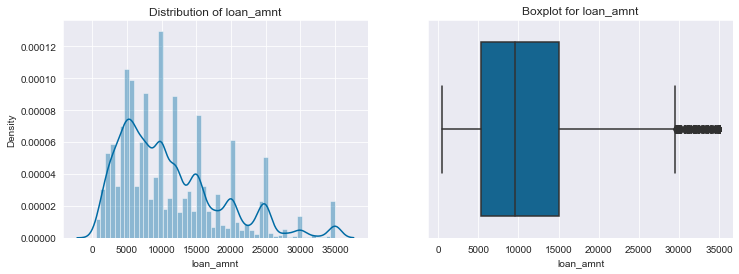

In [36]:
var = 'loan_amnt'
dist_descr_num(var=var, df=loan_df)
distplot_num(var=var, df=loan_df)

**Finding**: 
- In the distribution, there are spikes at round figures(multiples of 5k)
- There are a decent number of outliers 
- Will be creating bins of 5k intervals. Outliers will not have impact on bins

In [37]:
#Create bins
loan_df['loan_amnt_bin'] = pd.cut(loan_df.loan_amnt
                       ,bins =[0,5000,10000,15000,20000,25000,30000,36000] 
                       , labels = ['0-5k','5-10k','10-15k','15-20k','20-25k','25-30k','30-36k'])

#check
loan_df.loan_amnt_bin.head()

0     0-5k
1     0-5k
2     0-5k
3    5-10k
5     0-5k
Name: loan_amnt_bin, dtype: category
Categories (7, object): ['0-5k' < '5-10k' < '10-15k' < '15-20k' < '20-25k' < '25-30k' < '30-36k']

#### **Annual Income**


Percentile distribution of annual_inc

count      38514.00
mean       68811.40
std        64223.55
min         4000.00
0%          4000.00
1%         14400.00
5%         24000.00
10%        30000.00
25%        40000.00
50%        59000.00
75%        82000.00
90%       115000.00
95%       140004.00
99%       234000.00
max      6000000.00
Name: annual_inc, dtype: float64


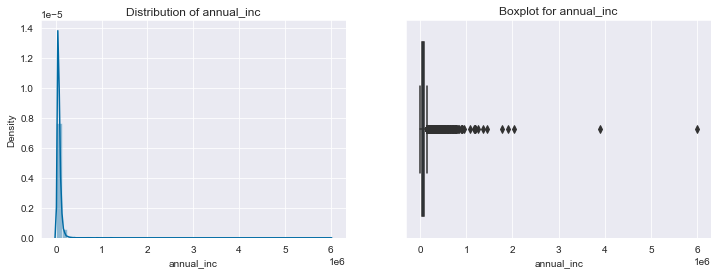

In [38]:
var = 'annual_inc'
dist_descr_num(var=var, df=loan_df)
distplot_num(var=var, df=loan_df)

**Finding**: 
- Annual Inc has outliers to the very extreme. Max is 6 million compared with median of 59k
- Creating bins of 20k intervlas. The final bin of 200k+ will include all outliers as well

In [39]:
#Create bins
loan_df['annual_inc_bin'] = pd.cut(loan_df.annual_inc
                       ,bins =[0,20000,40000,60000,80000,100000,120000,140000,160000,180000,200000,6000000] 
                       , labels = ['0-20k','20-40k','40-60k','60-80k','80-100k','100-120k','120-140k',
                                  '140-160k','160-180k','180-200k','200k+'])

#check
loan_df.annual_inc_bin.head()

0    20-40k
1    20-40k
2     0-20k
3    40-60k
5    20-40k
Name: annual_inc_bin, dtype: category
Categories (11, object): ['0-20k' < '20-40k' < '40-60k' < '60-80k' ... '140-160k' < '160-180k' < '180-200k' < '200k+']

#### **DTI**


Percentile distribution of dti

count    38514.00
mean        13.28
std          6.67
min          0.00
0%           0.00
1%           0.36
5%           2.11
10%          4.06
25%          8.14
50%         13.37
75%         18.56
90%         22.29
95%         23.80
99%         26.53
max         29.99
Name: dti, dtype: float64


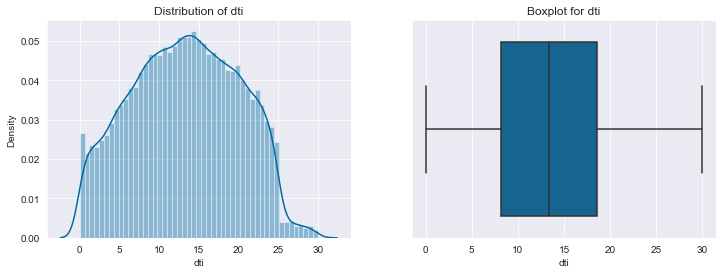

In [40]:
var = 'dti'
dist_descr_num(var=var, df=loan_df)
distplot_num(var=var, df=loan_df)

**Finding**: 
- DTI is neatly distributed with mean ~ median
- Creating bins of 5 

In [41]:
#Create bins
loan_df['dti_bin'] = pd.cut(loan_df.dti
                       ,bins =[0,5,10,15,20,25,30] 
                       , labels = ['0-5','5-10','10-15','15-20','20-25','25-30'])
                                  

#check
loan_df.dti_bin.head()

0    25-30
1      0-5
2     5-10
3    15-20
5    10-15
Name: dti_bin, dtype: category
Categories (6, object): ['0-5' < '5-10' < '10-15' < '15-20' < '20-25' < '25-30']

#### **Interest Rate**


Percentile distribution of int_rate

count    38514.00
mean        11.93
std          3.69
min          5.42
0%           5.42
1%           5.42
5%           6.17
10%          7.14
25%          8.94
50%         11.71
75%         14.35
90%         16.82
95%         18.30
99%         20.90
max         24.40
Name: int_rate, dtype: float64


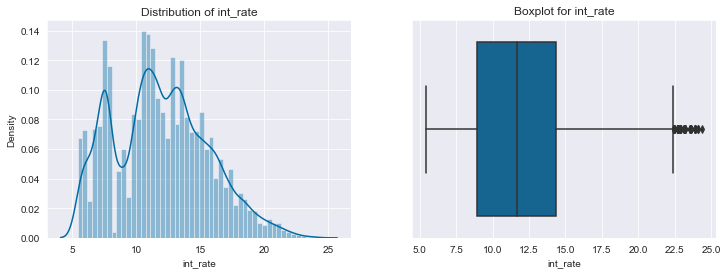

In [42]:
var = 'int_rate'
dist_descr_num(var=var, df=loan_df)
distplot_num(var=var, df=loan_df)

**Finding**: 
- skewed dsitribution
- created bins of 5

In [43]:
#Create bins
loan_df['int_rate_bin'] = pd.cut(loan_df.int_rate
                       ,bins =[5,10,15,20,25] 
                       , labels = ['5-10','10-15','15-20','20-25'])
                                  

#check
loan_df.int_rate_bin.head()

0    10-15
1    15-20
2    15-20
3    10-15
5     5-10
Name: int_rate_bin, dtype: category
Categories (4, object): ['5-10' < '10-15' < '15-20' < '20-25']

In [44]:
#### DO WE NEED ANOTHER ONE FOR INSTALLMENTS????

### **Derived columns & Binning**

In [45]:
######## LOAN AMOUNT TO ANNUAL INCOME RATIO - derived variable
loan_df['loan_to_income_ratio'] = loan_df.loan_amnt/loan_df.annual_inc

loan_df.loan_to_income_ratio.head()

0    0.208333
1    0.083333
2    0.195886
3    0.203252
5    0.138889
Name: loan_to_income_ratio, dtype: float64

#### Loan to Income Ratio

In [46]:
loan_df.loan_to_income_ratio.describe(percentiles=[0,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]).round(2)

count    38514.00
mean         0.19
std          0.12
min          0.00
0%           0.00
1%           0.02
5%           0.04
10%          0.06
25%          0.10
50%          0.16
75%          0.25
90%          0.35
95%          0.41
99%          0.52
max          0.83
Name: loan_to_income_ratio, dtype: float64

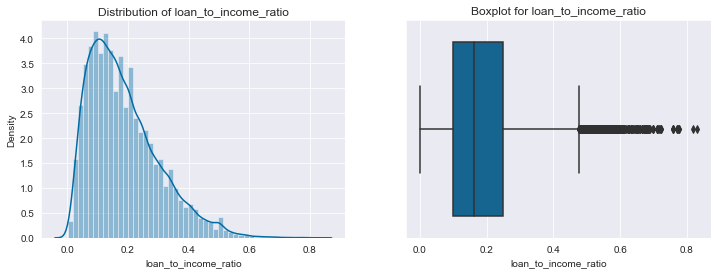

In [47]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.distplot(loan_df.loan_to_income_ratio)
plt.title("Distribution of loan_to_income_ratio")

plt.subplot(1,2,2)
sns.boxplot(loan_df.loan_to_income_ratio)
plt.title("Boxplot for loan_to_income_ratio")
    
plt.show()       

In [48]:
#Create bins
loan_df['loan_to_income_ratio_bin'] = pd.cut(loan_df.loan_to_income_ratio
                       ,bins =[0,0.05,0.10,0.15,0.20,0.25,0.3,0.35,0.4,0.45,0.84] 
                       , labels = ['0-.5','.5-.10','.10-.15','.15-.20','.20-.25',
                                  '.25-.30','.30-.35','.35-.40','.40-.45','.45+'])
                                  

#check
loan_df.loan_to_income_ratio_bin.head()

0    .20-.25
1     .5-.10
2    .15-.20
3    .20-.25
5    .10-.15
Name: loan_to_income_ratio_bin, dtype: category
Categories (10, object): ['0-.5' < '.5-.10' < '.10-.15' < '.15-.20' ... '.30-.35' < '.35-.40' < '.40-.45' < '.45+']

### Loan Issue Date

In [49]:
# Extract Year from Issue date for categorical analysis
loan_df['issue_y']=loan_df['issue_d'].dt.year.astype(str)
print(loan_df.issue_y.head())

0    2011
1    2011
2    2011
3    2011
5    2011
Name: issue_y, dtype: object


### Credit Age
####    Credit Age can be derived by finding timedelta between Date when the 'loan was funded' to when 'first credit line was opened'  

In [50]:
# Calculate credit age from when the 'loan was funded' to when 'first credit line was opened'
loan_df['credit_age']=loan_df.issue_d - loan_df.earliest_cr_line
print(loan_df.credit_age.describe())

print(" \nConverting Delta from days to Years \n")
loan_df['credit_age'] = loan_df['credit_age']/ np.timedelta64(1, "Y")
loan_df['credit_age'] = np.around(loan_df.credit_age,0).astype(np.int64)
print(loan_df.credit_age.describe())

# Check new
loan_df.credit_age.head()

count                           38514
mean     5014 days 22:06:58.382925696
std      2494 days 20:56:32.085670048
min                1095 days 00:00:00
25%                3318 days 00:00:00
50%                4566 days 00:00:00
75%                6209 days 00:00:00
max               23892 days 00:00:00
Name: credit_age, dtype: object
 
Converting Delta from days to Years 

count    38514.000000
mean        13.725970
std          6.839905
min          3.000000
25%          9.000000
50%         13.000000
75%         17.000000
max         65.000000
Name: credit_age, dtype: float64


0    27
1    13
2    10
3    16
5     7
Name: credit_age, dtype: int64

In [51]:
# Create bin for credit age
#Create bins
loan_df['credit_age_bin'] = pd.qcut(loan_df['credit_age'], q=15, precision=0)
#check
loan_df.credit_age_bin.value_counts()

(5.0, 7.0]      3551
(15.0, 17.0]    3444
(2.0, 5.0]      3005
(10.0, 11.0]    2980
(11.0, 12.0]    2910
(18.0, 21.0]    2875
(9.0, 10.0]     2795
(12.0, 13.0]    2578
(25.0, 65.0]    2424
(13.0, 14.0]    2357
(21.0, 25.0]    2353
(8.0, 9.0]      2152
(14.0, 15.0]    2034
(7.0, 8.0]      1859
(17.0, 18.0]    1197
Name: credit_age_bin, dtype: int64

### open_acc

In [52]:
# Create bin for open_acc
loan_df['open_acc_bin'] = pd.qcut(loan_df['open_acc'], q=10, precision=0)
#check
loan_df.credit_age_bin.value_counts()

(5.0, 7.0]      3551
(15.0, 17.0]    3444
(2.0, 5.0]      3005
(10.0, 11.0]    2980
(11.0, 12.0]    2910
(18.0, 21.0]    2875
(9.0, 10.0]     2795
(12.0, 13.0]    2578
(25.0, 65.0]    2424
(13.0, 14.0]    2357
(21.0, 25.0]    2353
(8.0, 9.0]      2152
(14.0, 15.0]    2034
(7.0, 8.0]      1859
(17.0, 18.0]    1197
Name: credit_age_bin, dtype: int64

## **Exploratory Analysis & Data Visualisation:**
--------------------------------------------------------------------------------
- univariates,
- bivariates, 
- derived variables, 
- Analysis of Default rate % metric,
- Different charts/visuals


In [53]:
# Target variable
loan_df['Default_flag'] = loan_df.loan_status.apply(lambda x : 1 if x == 'Charged Off' else 0)
#check
loan_df.Default_flag.value_counts()

0    32906
1     5608
Name: Default_flag, dtype: int64

In [54]:
# Target variable Yes/No
loan_df['Default_YesNo'] = loan_df.loan_status.apply(lambda x : 'Yes' if x == 'Charged Off' else 'No')
#check
loan_df.Default_YesNo.value_counts()

No     32906
Yes     5608
Name: Default_YesNo, dtype: int64

### **Variables of interest for the analysis:**

In [55]:
#Before starting analysis, lets check all columns we have and figure out which ones to use
#loan_df.columns
print(loan_df.columns.tolist())

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'recoveries', 'collection_recovery_fee', 'last_credit_pull_d', 'pub_rec_bankruptcies', 'loan_amnt_bin', 'annual_inc_bin', 'dti_bin', 'int_rate_bin', 'loan_to_income_ratio', 'loan_to_income_ratio_bin', 'issue_y', 'credit_age', 'credit_age_bin', 'open_acc_bin', 'Default_flag', 'Default_YesNo']


In [56]:
# Break down our list into how we want to use going forward from here
categ_var_list_of_interest = ['emp_length','term','grade','sub_grade', 'home_ownership'
            ,'verification_status','delinq_2yrs','pub_rec_bankruptcies','addr_state','issue_y']

num_var_list_of_interest = ['loan_amnt','annual_inc','int_rate','installment','dti','credit_age','open_acc']

num_var_bins_list = ['loan_amnt_bin','annual_inc_bin','int_rate_bin','dti_bin','loan_to_income_ratio_bin','credit_age_bin','open_acc_bin']

date_related_columns = ['issue_d','earliest_cr_line','last_credit_pull_d']

other_columns = ['id','member_id','funded_amnt','funded_amnt_inv','emp_title','loan_status',
                'url','desc','purpose','title','zip_code','inq_last_6mths','pub_rec',
                'revol_bal','revol_util','total_acc','recoveries','collection_recovery_fee',
                ]

### **Analysing Categorical variables:**

In [57]:
def plot_categ(df,var,figsize=[12,8]):  
         
        plt.figure(figsize=figsize)
        plt.subplot(1,2,1)
        sns.countplot(y=loan_df[var])
        plt.title(("Distribution of " + var), fontsize=12)
                
        plt.subplot(1,2,2)
        sns.barplot(y=df[var], x=df['Default_flag'], palette = 'hls')
        plt.title("Default Rate by " + var, fontsize=12)
        plt.show()

#### Emp length

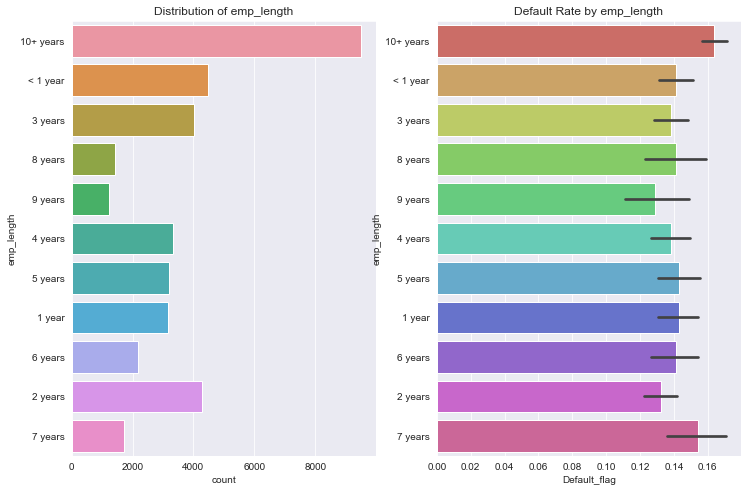

In [58]:
var = 'emp_length'
plot_categ(df = loan_df, var=var)

**Finding**: 
- '10+ years' group stands out. Has good volume as well has higher default rate

#### Term

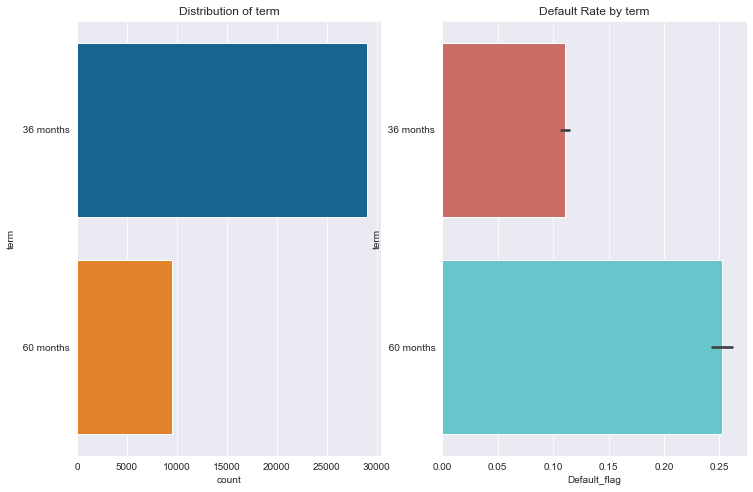

In [59]:
var = 'term'
plot_categ(df = loan_df, var=var)

**Finding**: 
- Clearly, '60 months' term group has much higher default rate than 36 months


#### Grade & Subgrade

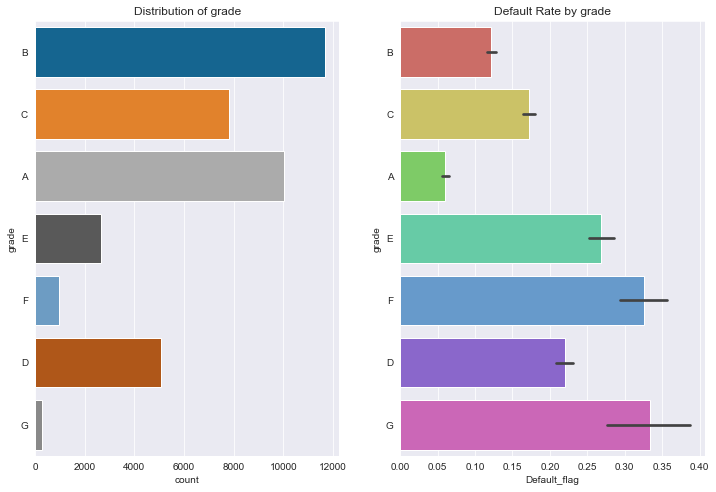

In [60]:
var = 'grade'
plot_categ(df = loan_df, var=var)

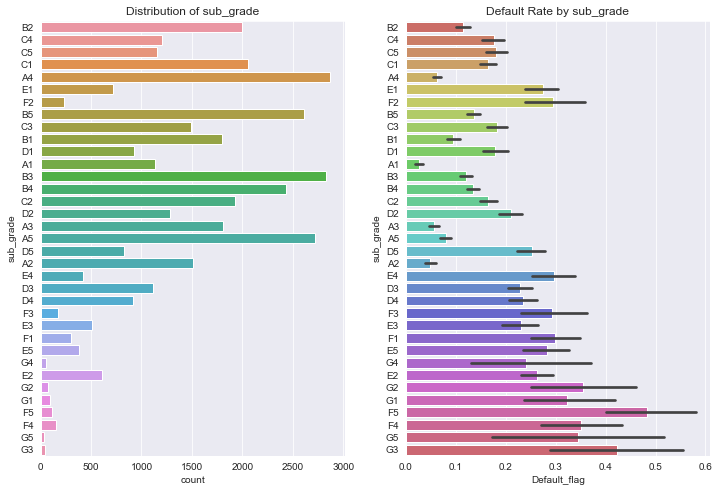

In [61]:
var = 'sub_grade'
plot_categ(df = loan_df, var=var)

**Finding:**
- It is unclear how the grade and subgrade are calculated, but there is definitely a positve correlation between default rate and grade, subgrade
- The lending club grade and sub grade are related. The grades are in an ordinal scale where starting scale like A1,B1 have lower default rate which further increases by the end of the ordinal scale. Lower alphabet grade(A,B...), subgrade(A1,B1) have lower default rates.


#### Home ownership

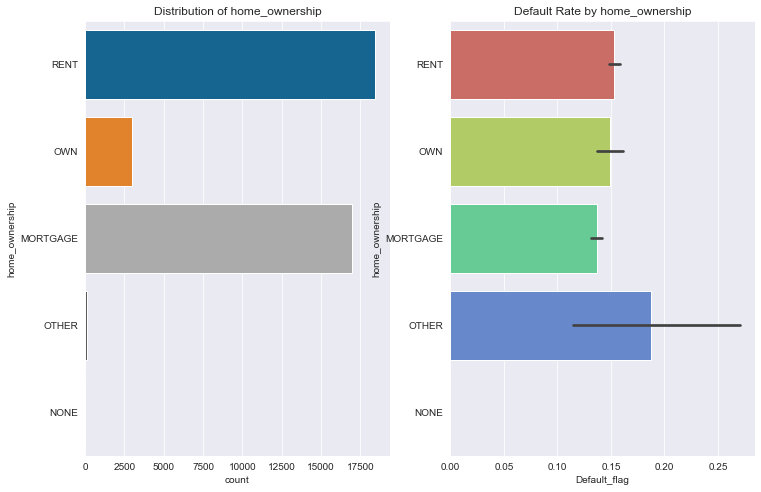

In [62]:
var = 'home_ownership'
plot_categ(df = loan_df, var=var)

**Finding:**
- 'Other' whose count is the lowest have the highest default rate 
- 'Rent' and 'Own' have similar default rate
- 'Mortgage' group has slightly lower default rate

#### Verification status

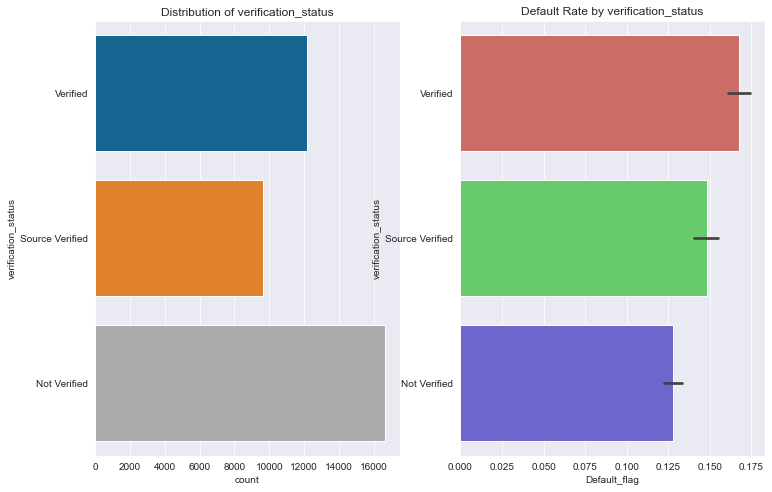

In [63]:
var = 'verification_status'
plot_categ(df = loan_df, var=var)

**Finding:**
- This is a very strange finding
- 'Not verified' has lower default rate than 'Verified'

#### Delinq_2yrs

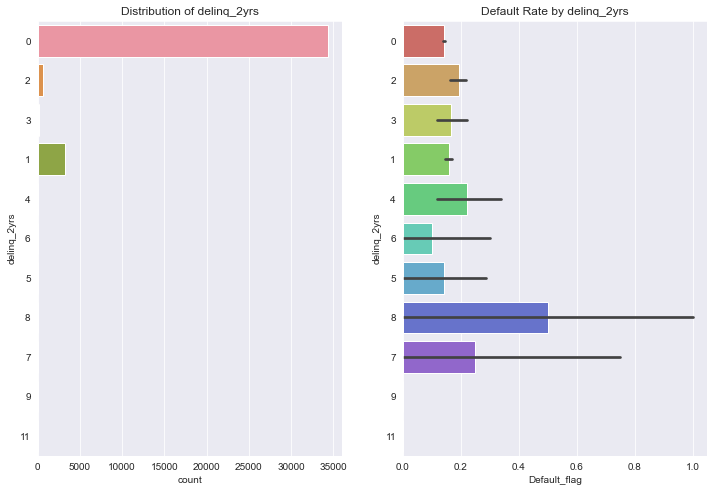

In [64]:
var = 'delinq_2yrs'
plot_categ(df = loan_df, var=var)

**Finding:**
- The increase in delinq_2yrs count from 0 to 11 also increases the Default rate.
- However for 5 and 6 the default rate is less than others which may be because of very low count.

In [65]:
#### Open acc -- Moved to numeric binned
#var = 'open_acc'
#plot_categ(df = loan_df, var=var)

#### 'pub_rec_bankruptcies'

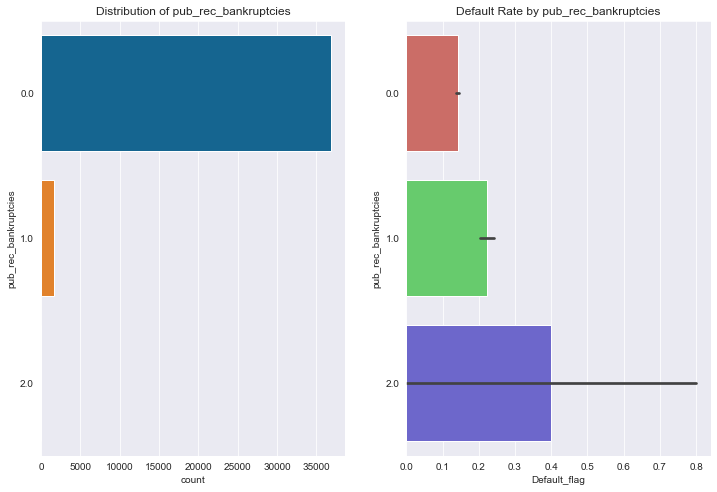

In [66]:
var = 'pub_rec_bankruptcies'
plot_categ(df = loan_df, var=var)

**Finding:**
- Higher the bankruptcies, the higher is the default rate

#### 'addr_state'

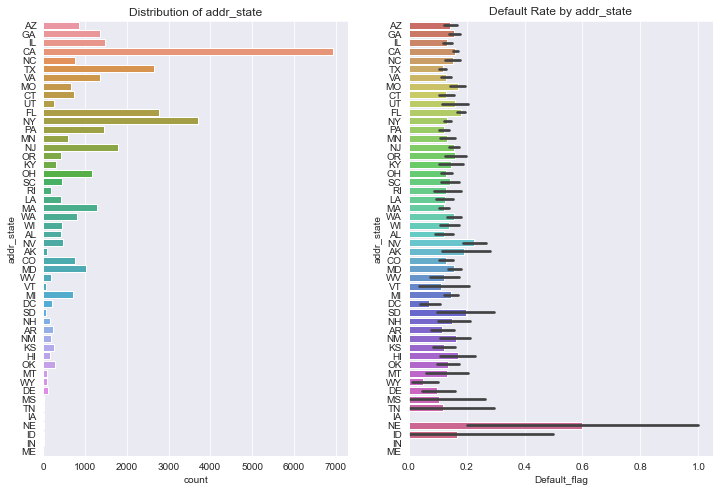

In [67]:
var = 'addr_state'
plot_categ(df = loan_df, var=var)

**Finding:**
- A state wide distribution chart would be difficult to read as there are lot of State values
- However, it can be noted, that there are some state that have higher default rate marginally
- it would interesting to map the states to see if there is any geographical relationship with default behavior

#### Purpose

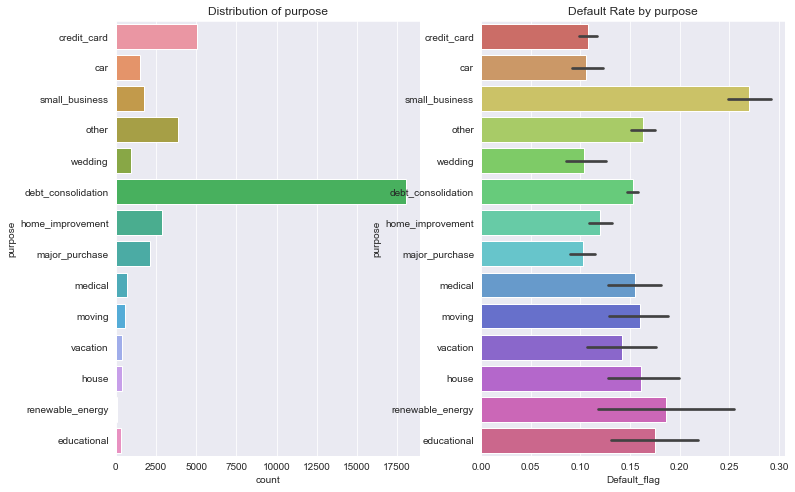

In [68]:
var = 'purpose'
plot_categ(df = loan_df, var=var)

**Finding:**
- debt_consolidation has the largest share of all the approved loan.
- small_business loans have the higest default rates.
- major purchases has the lowest default rate among all loan purpose.

#### 'issue_y'

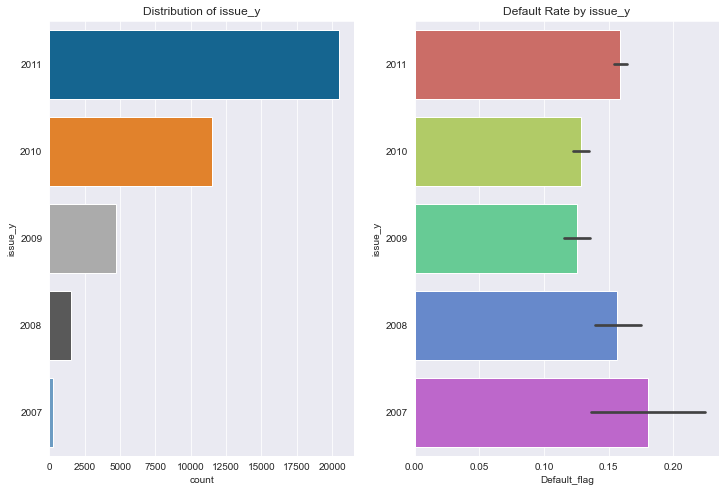

In [69]:
var = 'issue_y'
plot_categ(df = loan_df, var=var)

**Finding:**
- The number of loans issued have gone up from 2007 to 2011 and the default rate went down during these year until 2011, where we see spike in default rate.
- 2010 has lower default rate compared with 2011

### **Analysing Numerical variables:**


In [70]:
def num_plot(df, var):
    sns.boxplot(y = df[var],x = df['Default_flag'],palette='hls')
    plt.title(("Box plot & Variation between Default Flag and " + var), fontsize=12)
    plt.show()

#### Loan_amnt

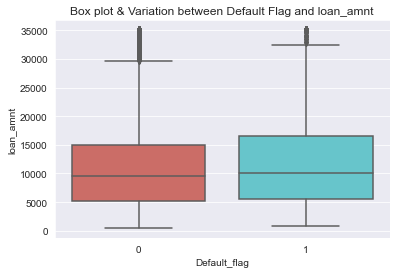

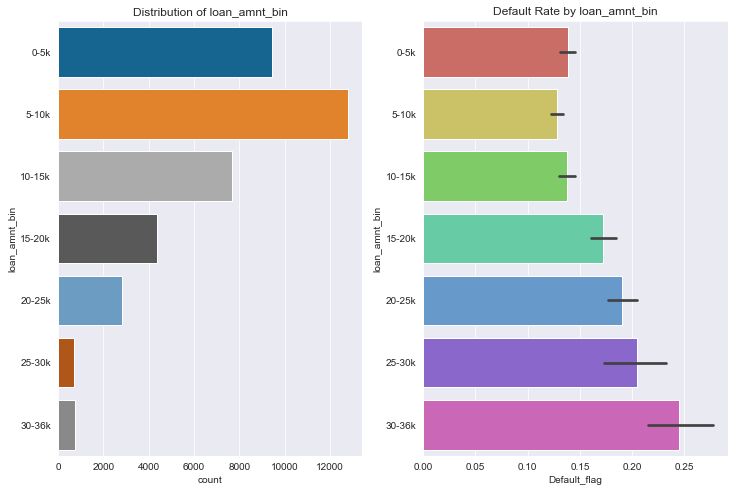

In [71]:
var = 'loan_amnt'
var_bin = var+'_bin'
num_plot(loan_df, var)
plot_categ(loan_df,var_bin,figsize=[12,8])

**Finding:**
- interesting distribution in the chart above. From 15k onwards, there is a noted difference in the default rate as we go to higher loan amount bins

#### Annual inc

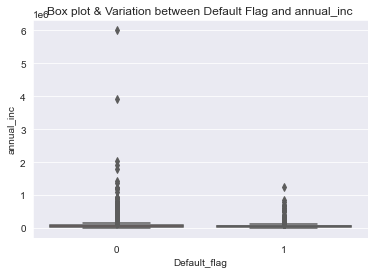

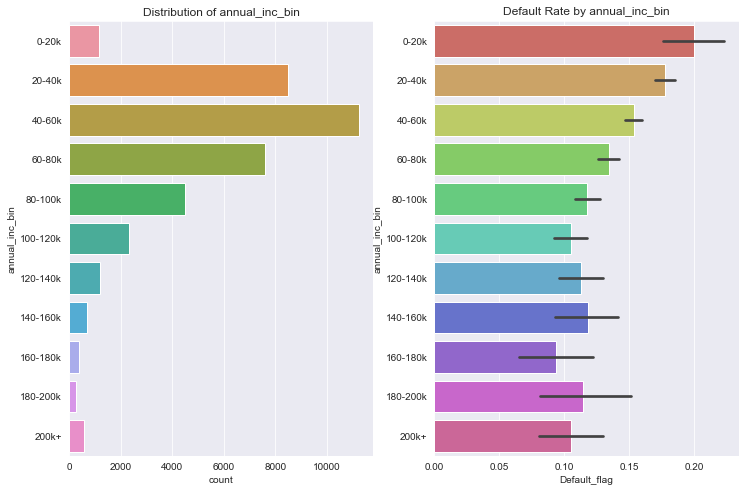

In [72]:
var = 'annual_inc'
var_bin = var+'_bin'
num_plot(loan_df, var)
plot_categ(loan_df,var_bin,figsize=[12,8])

**Finding:**
- as expected lower incomes have higher default rate, atleast until 80k
- And then onwards with higher annual income the default rate is on lower side.

#### DTI

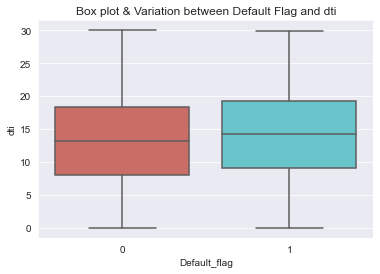

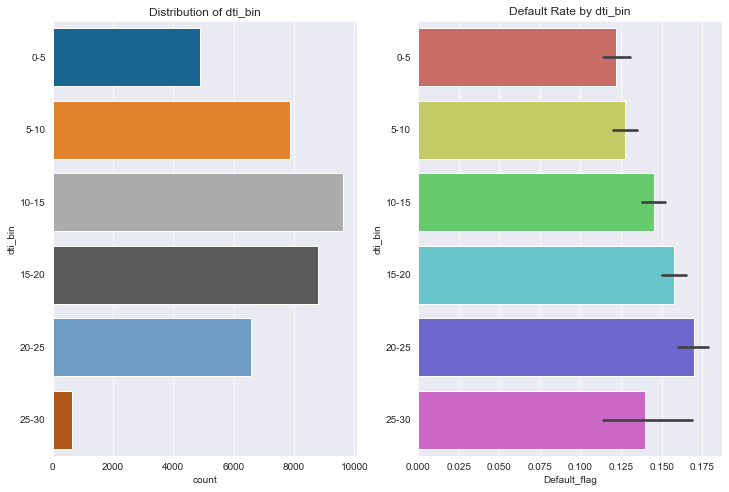

In [73]:
var = 'dti'
var_bin = var+'_bin'
num_plot(loan_df, var)
plot_categ(loan_df,var_bin,figsize=[12,8])

**Finding:**
- as expected, higher the DTI, higher the default rate
- Thus it's risky to offer loan to cutomers with high DTI.

#### Int rate

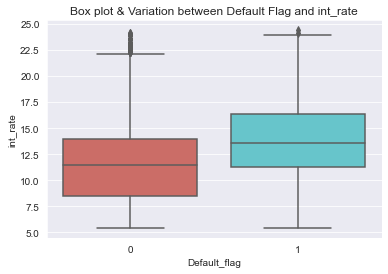

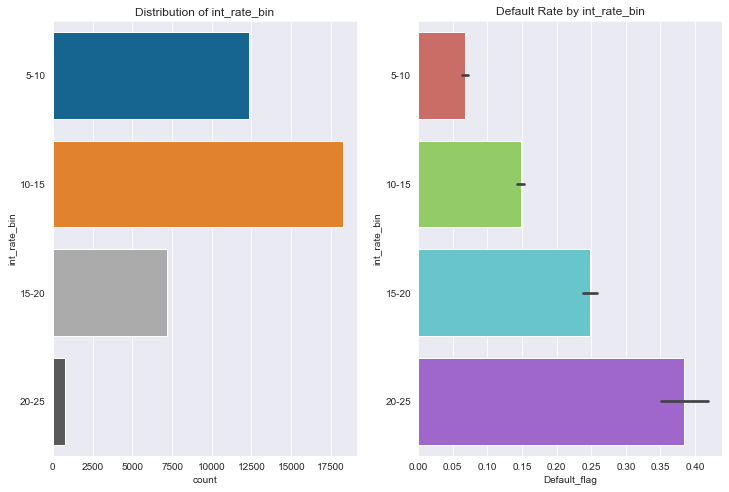

In [74]:
var = 'int_rate'
var_bin = var+'_bin'
num_plot(loan_df, var)
plot_categ(loan_df,var_bin,figsize=[12,8])

**Finding:**
- difficult to interpret this
- lower interest rates show lower default rates
- but this could actually be becasue lower interest rates are offerred to customers who are capable of repayment. So, we need to be careful in drawing the inference here.
- The higher default rate among high intrerest rate category evidently says it's risky to offer high interest loan to cutomers. 

#### Loan to income ratio

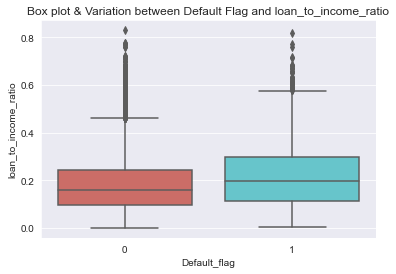

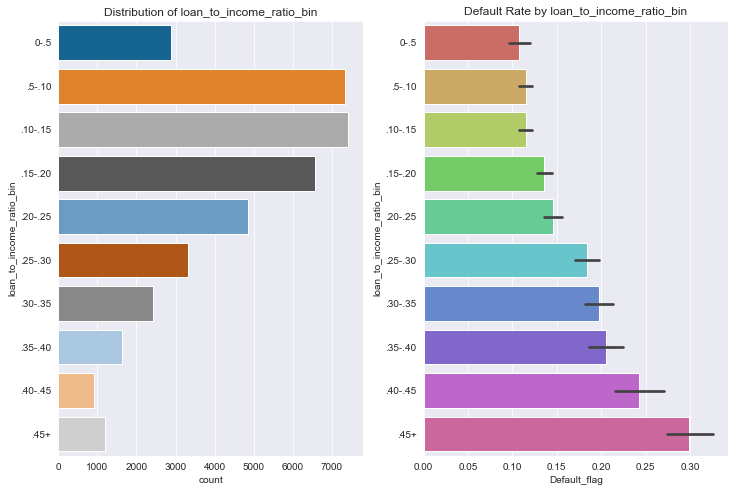

In [75]:
var = 'loan_to_income_ratio'
var_bin = var+'_bin'
num_plot(loan_df, var)
plot_categ(loan_df,var_bin,figsize=[12,8])

**Finding:**
- As expected, very similar pattern to DTI. Higher the ratio, higher the default rate.

#### Credit age

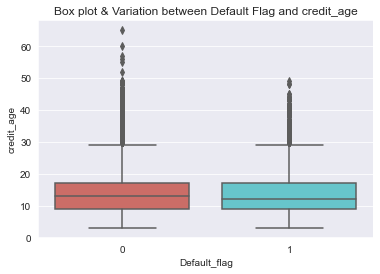

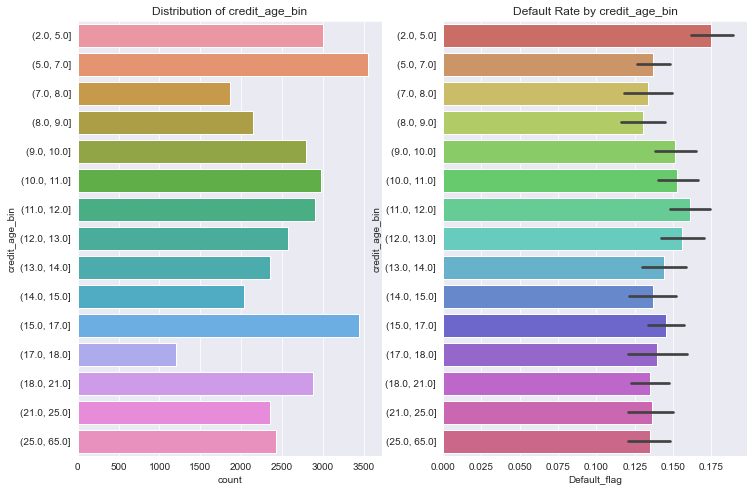

In [76]:
var = 'credit_age'
var_bin = var+'_bin'
num_plot(loan_df, var)
plot_categ(loan_df,var_bin,figsize=[12,8])

**Finding:**
- The credit age to Default rate shows a mixed trend. We see slightly higher default rate for credit age below 5 years incomparion to the rest.
- One reason for this higher default rate can be among young applicant who don't have good outstanding financial status.   

### open_acc

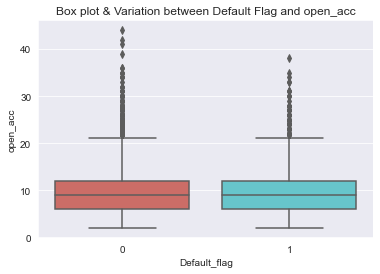

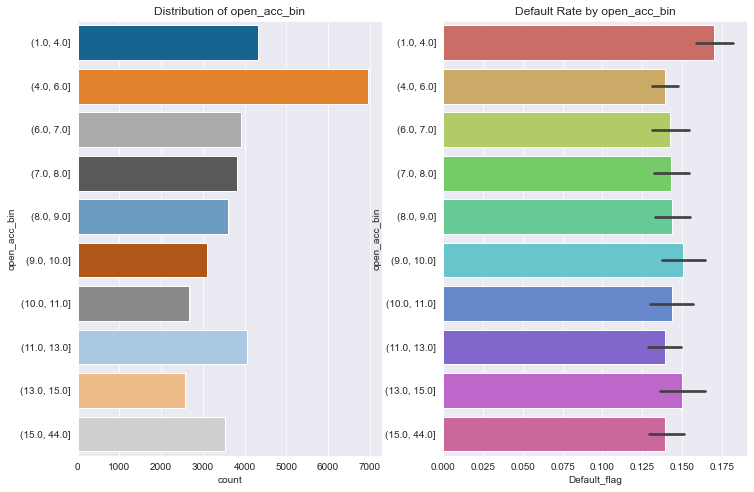

In [77]:
var = 'open_acc'
var_bin = var+'_bin'
num_plot(loan_df, var)
plot_categ(loan_df,var_bin,figsize=[12,8])

**Finding:**
- The customers with open credit line below 4 have higher default rate. 

### Correlation findings among variables

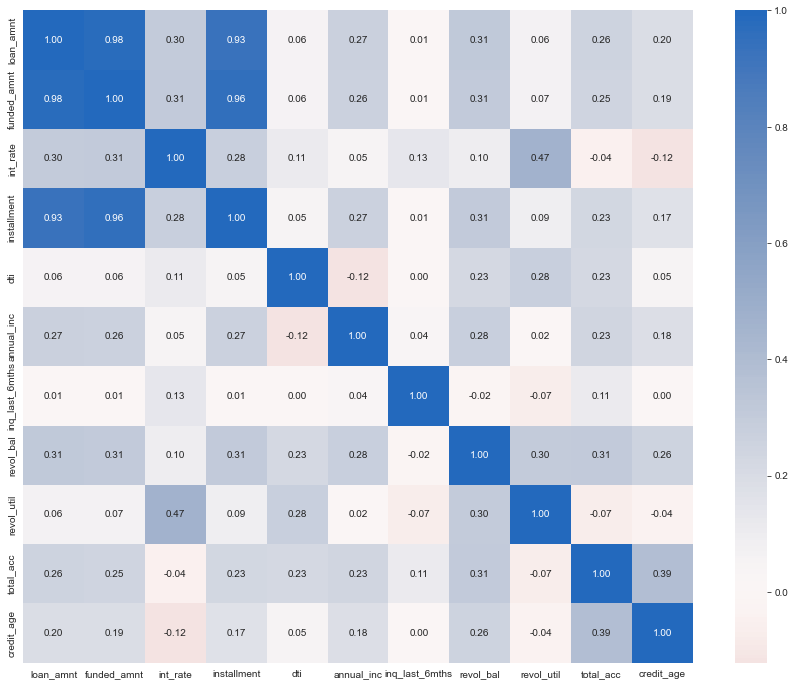

In [78]:
loan_corr = loan_df[['loan_amnt','funded_amnt','term','int_rate','installment','emp_length','dti','annual_inc','delinq_2yrs','inq_last_6mths','revol_bal','revol_util','total_acc','credit_age']].corr()
plt.figure(figsize=[15,12])
sns.heatmap(loan_corr,annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.show()

**Finding:**
- for this default analysis, the variable of interest is 'Default_flag'
- hence the findings from the correlation matrix will not tell us anything related to the problem of interest 
- What the correlation matrix tells us though is that loan_amnt, funded_amnt & installment are all highly correlated and we would expect also. Hence when analysing, the default patterns, we can only analysie one of these variable. This is inline with the above analysis where we looked at loan amnt only

## **Summary:**
----------------------------------------------

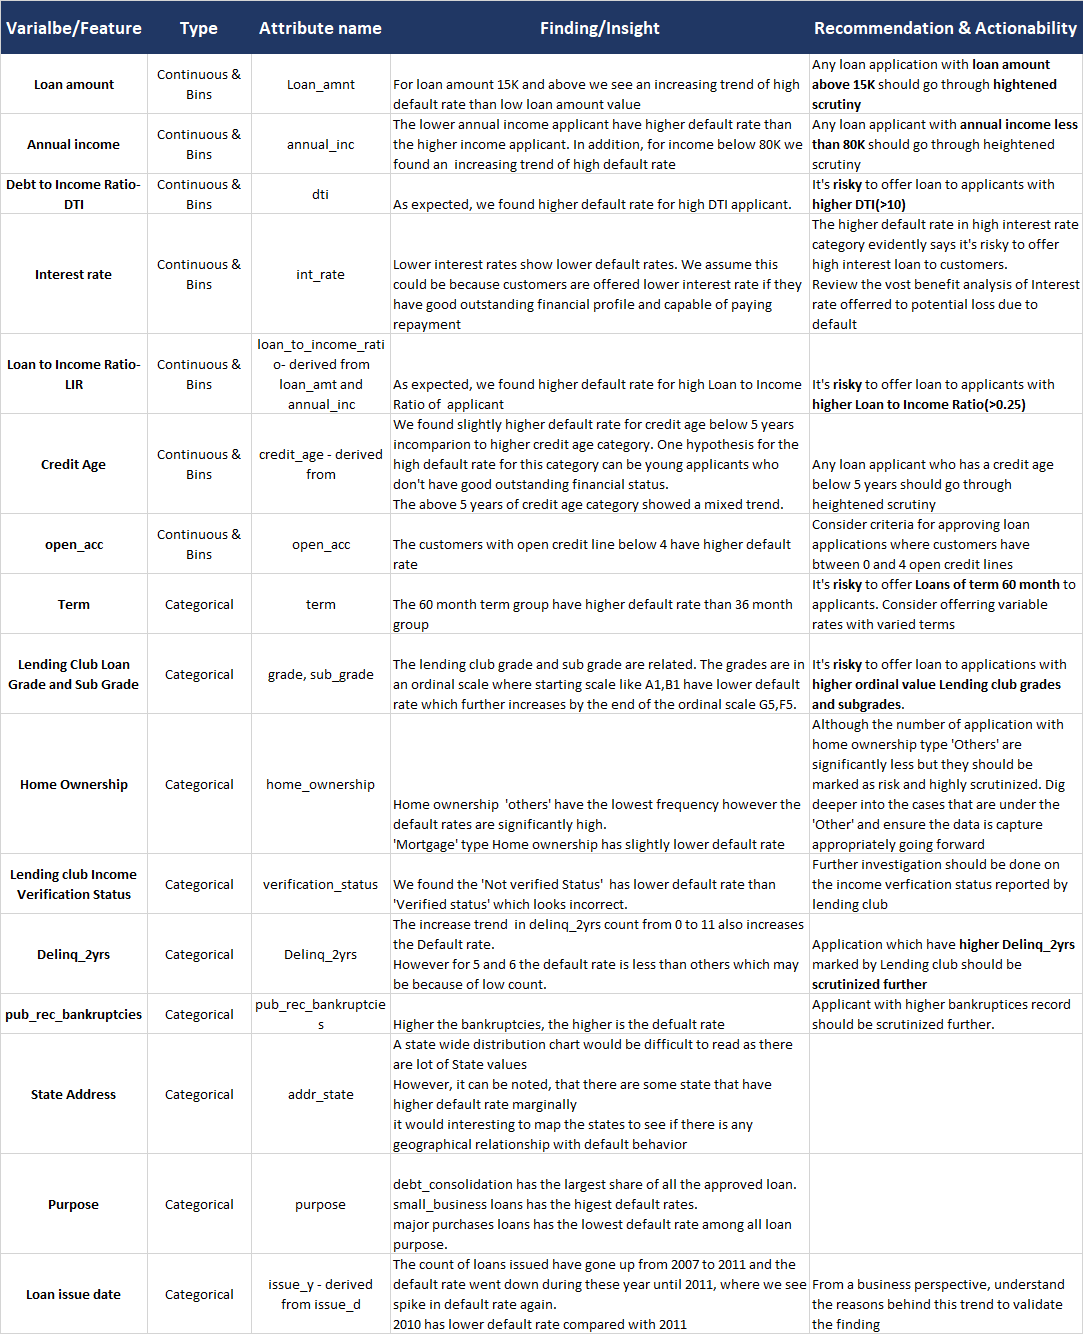!